## Clustering
One of the main ideas behind collaborative filtering is that if user A has the same opinion of a product as user B, then A is also more likely to have the same opinion as B on another product than that of a randomly chosen user.

Clustering is one of the most popular techniques used in collaborative-filtering algorithms. It is a type of unsupervised learning that groups data points into different classes in such a way that data points belonging to a particular class are more similar to each other than data points belonging to different classes:

### k-means clustering
The k-means algorithm is one of the simplest yet most popular machine learning algorithms. It takes in the data points and the number of clusters (k) as input. 

Next, it randomly plots k different points on the plane (called centroids). After the k centroids are randomly plotted, the following two steps are repeatedly performed until there is no further change in the set of k centroids:
* Assignment of points to the centroids: Every data point is assigned to the centroid that is the closest to it. The collection of data points assigned to a particular centroid is called a cluster. Therefore, the assignment of points to k centroids results in the formation of k clusters.
* Reassignment of centroids: In the next step, the centroid of every cluster is recomputed to be the center of the cluster (or the average of all the points in the cluster). All the data points are then reassigned to the new centroids.

<div style="text-align: center;">
    <img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" alt="K-means Visualization">
</div>

The preceding screenshot shows a visualization of the steps involved in a k-means clustering algorithm, with the number of assigned clusters as two.

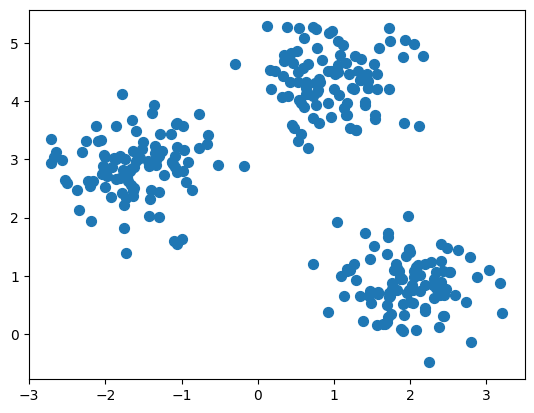

In [6]:
#Import the function that enables us to plot clusters
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3,
cluster_std=0.50, random_state=0)

#Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50);

One of the most important steps while using the k-means algorithm is determining the number of clusters. In this case, it can be clearly seen from the plot (and the code) that we've plotted the points in such a way that they form three clearly separable clusters. Let's now apply the k-means algorithm via scikit-learn and assess its performance:

c:\Users\Nirajan\Desktop\Fusemachines\Recommendation_System\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


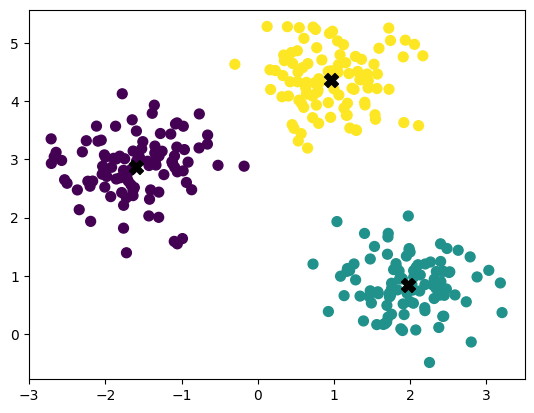

In [7]:
#Import the K-Means Class
from sklearn.cluster import KMeans

#Initializr the K-Means object. Set number of clusters to 3,
#centroid initilalization as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

#Compute the K-Means clustering
kmeans.fit(X)

#Predict the classes for every point
y_pred = kmeans.predict(X)

#Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

#### Choosing k
As stated in the previous subsection, choosing a good value of k is vital to the success of the k-means clustering algorithm. The number of clusters can be anywhere between 1 and the total number of data points (where each point is assigned to its own cluster).

Data in the real world is seldom of the type explored previously, where the points formed well defined, visually separable clusters on a two-dimensional plane. There are several methods available to determine a good value of K. In this section, we will explore the Elbow method of determining k.

The Elbow method computes the sum of squares for each value of k and chooses the elbow point of the sum-of-squares v/s K plot as the best value for k. The elbow point is defined as the value of k at which the sum-of-squares value for every subsequent k starts decreasing
much more slowly.

The sum of squares value is defined as the sum of the distances of each data point to the centroid of the cluster to which it was assigned. Mathematically, it is expressed as follows:
$$SS=\sum_{k} \sum_{x_i\in C_k} (x_i-\mu_k)^2$$
Here, $C_k$ is the $k^{th}$ cluster and $u_k$ is the corresponding centroid of $C_k$.

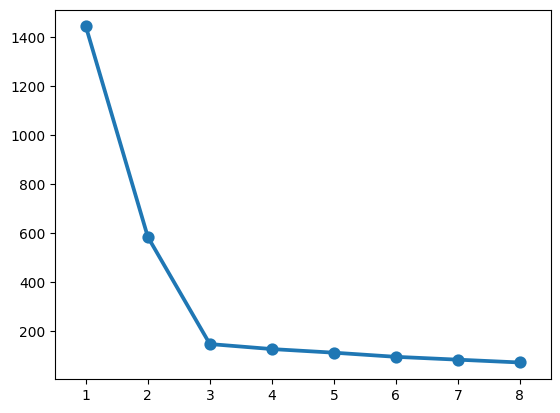

In [11]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#List that will hold the sum of square values for different cluster sizes
ss = []

#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,9):

    #Initialize the KMeans object and call the fit method to compute clusters
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)

    #Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss);

From the plot, it is clear that the Elbow is at K=3. From what we visualized earlier, we know that this is indeed the optimum number of clusters for this data.

### Other clustering algorithms
The k-means algorithm, although very powerful, is not ideal for every use case.

To illustrate, let's construct a plot with two half moons. Like the preceding blobs, scikitlearn gives us a convenient function to plot half-moon clusters:

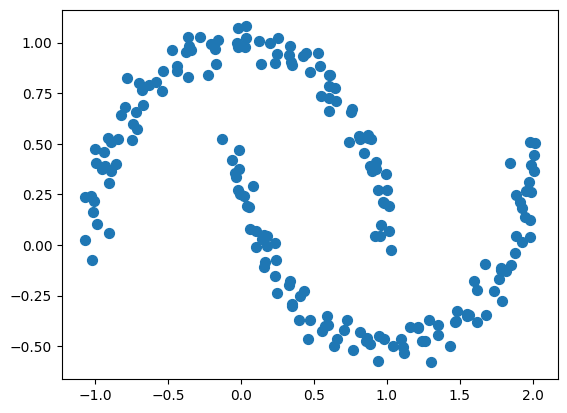

In [13]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50);

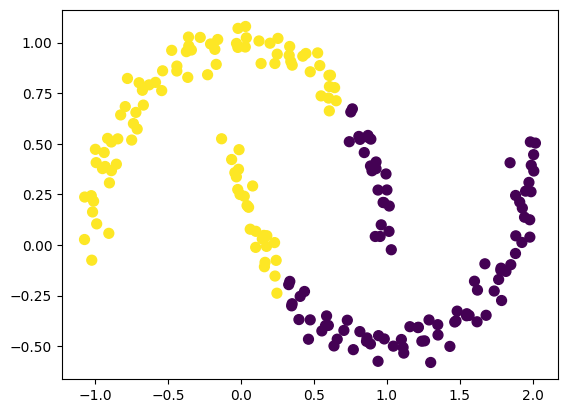

In [14]:
#Initialize K-Means Object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50);

We see that the k-means algorithm doesn't do a very good job of identifying the correct clusters. For clusters such as these half moons, another algorithm, called spectral clustering, with nearest-neighbor, affinity performs much better.

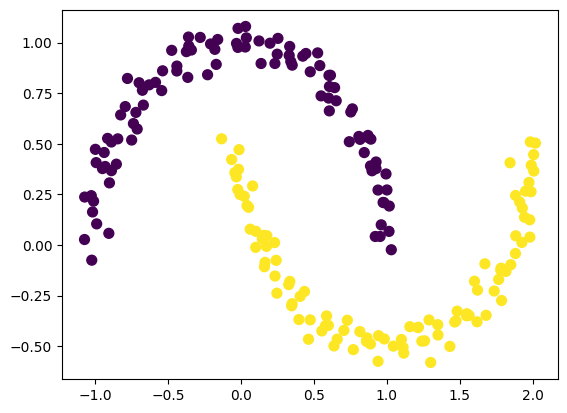

In [16]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);

We see that spectral clustering does a very good job of identifying the half-moon clusters.

We have seen that different clustering algorithms are appropriate in different cases. The same applies to cases of collaborative filters.